# Classifying the Risk Intensity Level for Maternal Mortality during Pregnancy

### Introduction

Reducing maternal mortality falls under the UN’s Third Sustainability Goal: good health and wellbeing. Significant risk factors that are responsible for maternal mortality during pregnancy are age, Systolic Blood Pressure (BP) and Diastolic Blood Pressure, Blood Sugar, Body Temperature, and Heart Rate. Age refers to age in years of the pregnant woman, systolic BP is the pressure in your arteries when your heart beats in mmHg, diastolic BP is the pressure in the arteries when the heart rests between beats in mmHg, body temperature is the resting body temperature in degrees fahrenheit, blood sugar is the blood glucose level in mmol/L, and heart rate is the resting heart rate in beats per minute. High Diastolic BP, Systolic BP, and heart rate places high strain on the heart such that it can fail and low values for these causes a lack of blood circulation. Low blood sugar can starve the brain of oxygen while high blood sugar can lead to toxic acids in the brain. These factors were measured in different hospitals, community clinics and maternal health care clinics in Bangladesh and collected using the loT based risk monitoring system. The IoT based risk monitoring system is an internet network containing the data from the mechanical and digital machines and the human data using a unique identifier. 1014 pregnancies were classified for their risk intensity level on a case-by-case basis based on midwifery assessments. Using this data set, we aim to answer the question of what is the risk intensity level (high, medium, low) for maternal mortality during pregnancy based on these risk factors? 

### Preliminary Exploratory Data Analysis 

In Table 1, the distrubtion of the three risk levels for maternal mortality was tabulated to determine the spread of data across the classes. In table 2, the total number of NA values across the training set was calculated to determine if there were any missing . In table 3, 

In [1]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [24]:
maternal_health_dataset <- read_csv("https://raw.githubusercontent.com/aniketc12/maternal_risk/main/data/maternal_health_risk.csv")

Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
maternal_split <- initial_split(maternal_health_dataset, prop = 0.75, strata = RiskLevel)
training_set <- training(maternal_split)
testing_set <- testing(maternal_split)

In [25]:
risk_distribution <- training_set |>
group_by(RiskLevel) |>
summarize(n=n())

In [37]:
na <- tibble(number_of_na_values = sum(is.na(training_set)))

In [38]:
min_vals_high <- training_set |>
    filter(RiskLevel == "high risk") |>
    map_df(min) 

max_vals_high <- training_set |>
    filter(RiskLevel == "high risk") |>
    map_df(max)

min_vals_mid <- training_set |>
    filter(RiskLevel == "mid risk") |>
    map_df(min) 
max_vals_mid <- training_set |>
    filter(RiskLevel == "mid risk") |>
    map_df(max)

min_vals_low <- training_set |>
    filter(RiskLevel == "low risk") |>
    map_df(min) 

max_vals_low <- training_set |>
    filter(RiskLevel == "low risk") |>
    map_df(max)

In [39]:
age_histogram <-  ggplot(training_set, aes(x = Age)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Age (years)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Age")



systolic_histogram <-  ggplot(training_set, aes(x = SystolicBP)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Systolic Blood Pressure (mmHg)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Systolic BP")

diastolic_histogram <-  ggplot(training_set, aes(x = DiastolicBP)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Diastolic Blood Pressure (mmHg)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Diastolic BP")

bs_histogram <- ggplot(training_set, aes(x = BS)) + 
geom_histogram(bins = 7, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Blood Sugar (mmol / L)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Blood Sugar")


bodytemp_histogram <-  ggplot(training_set, aes(x = BodyTemp)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Body Temperature (degrees Fahrenheit)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Body Temperature")

heartrate_histogram <-  ggplot(training_set, aes(x = HeartRate)) + 
geom_histogram(bins = 10, aes(fill = factor(RiskLevel, levels = c("high risk", "mid risk", "low risk")))) +
labs(x = "Heart Rate (beats per minute)", y = "Number of Patients", fill = "Risk Level") +
theme(text = element_text(size = 18)) +
ggtitle("Risk Level for Maternal Mortality \nbased on Heart Rate")


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,130,80,15.00,98,86,high risk
35,140,90,13.00,98,70,high risk
29,90,70,8.00,100,80,high risk
30,140,85,7.00,98,70,high risk
35,120,60,6.10,98,76,low risk
23,140,80,7.01,98,70,high risk
23,130,70,7.01,98,78,mid risk
35,85,60,11.00,102,86,high risk
32,120,90,6.90,98,70,mid risk


RiskLevel,n
<chr>,<int>
high risk,204
low risk,304
mid risk,252


number_of_na_values
<int>
0


Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp",
"HeartRate", "RiskLevel")


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12,83,60,6.1,98,60,high risk
65,160,100,19.0,103,90,high risk


Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp",
"HeartRate", "RiskLevel")


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,70,50,6,98,60,mid risk
60,140,100,18,103,88,mid risk


Joining, by = c("Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp",
"HeartRate", "RiskLevel")


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12,70,49,6,98,7,low risk
65,129,100,11,103,88,low risk


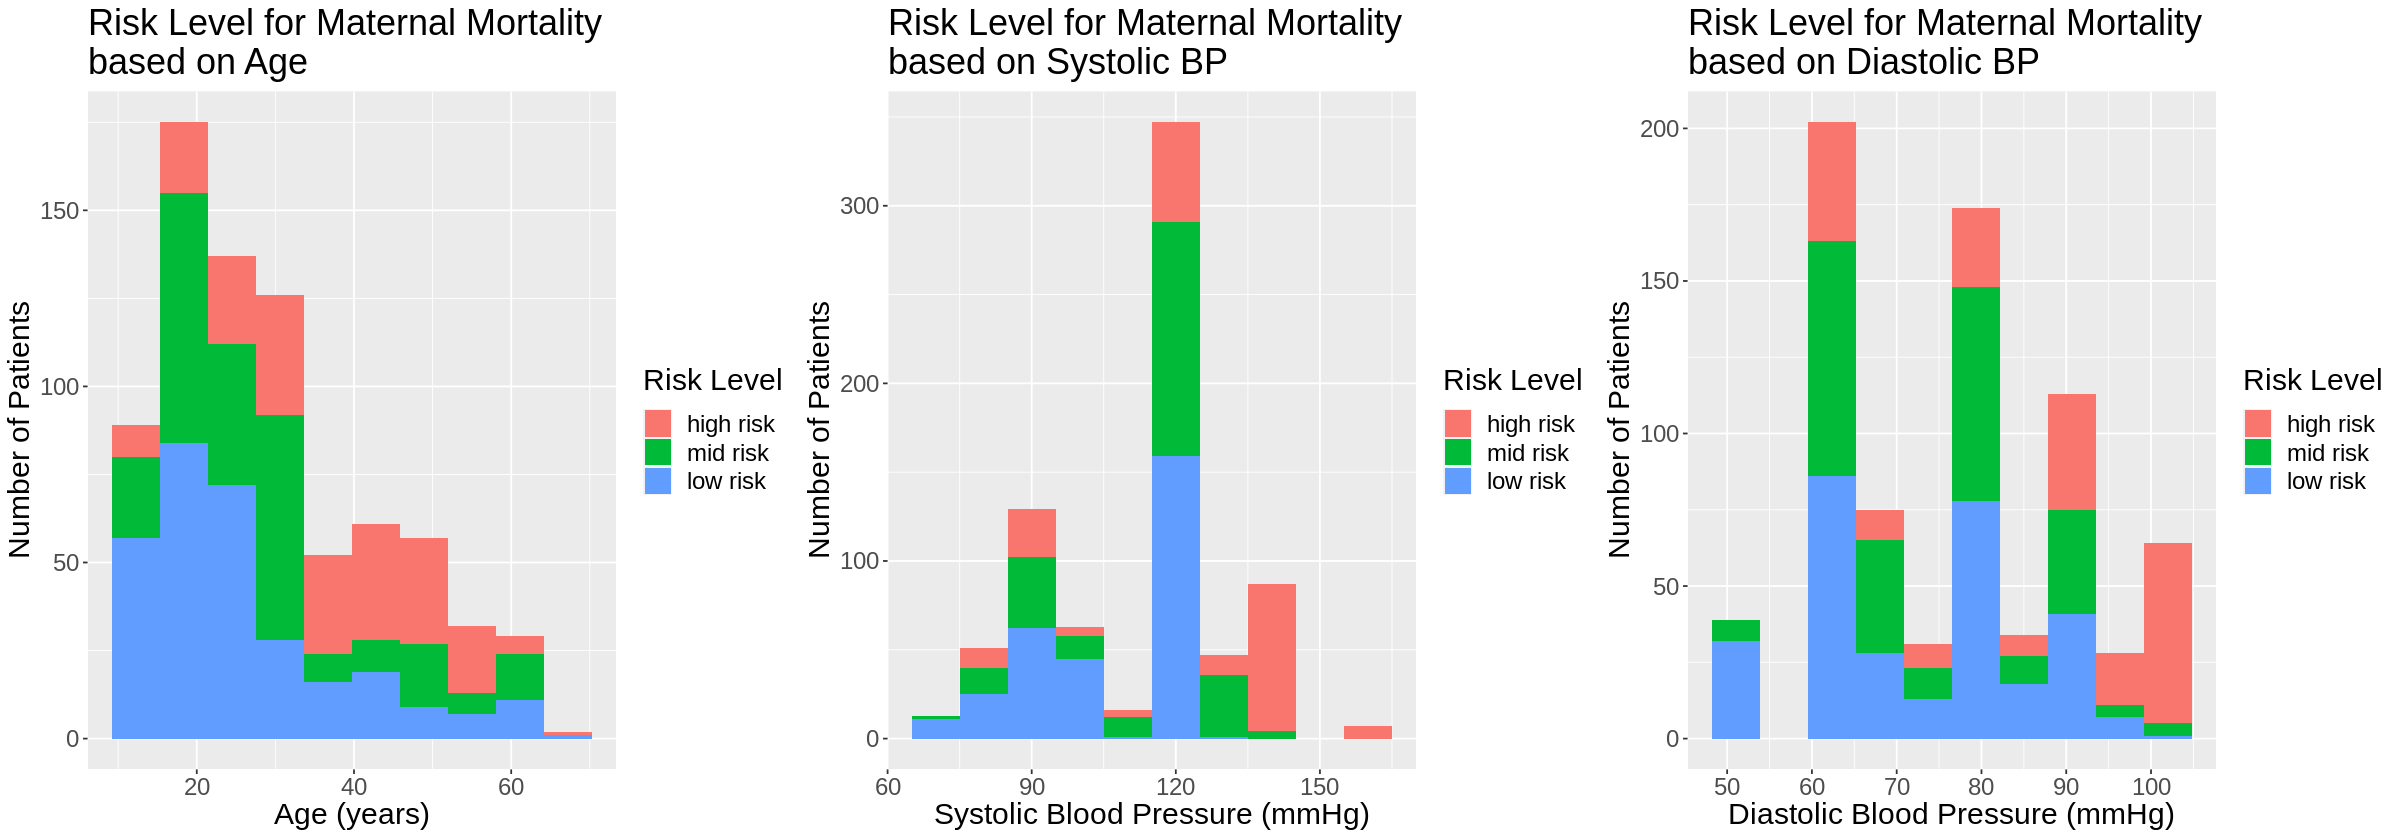

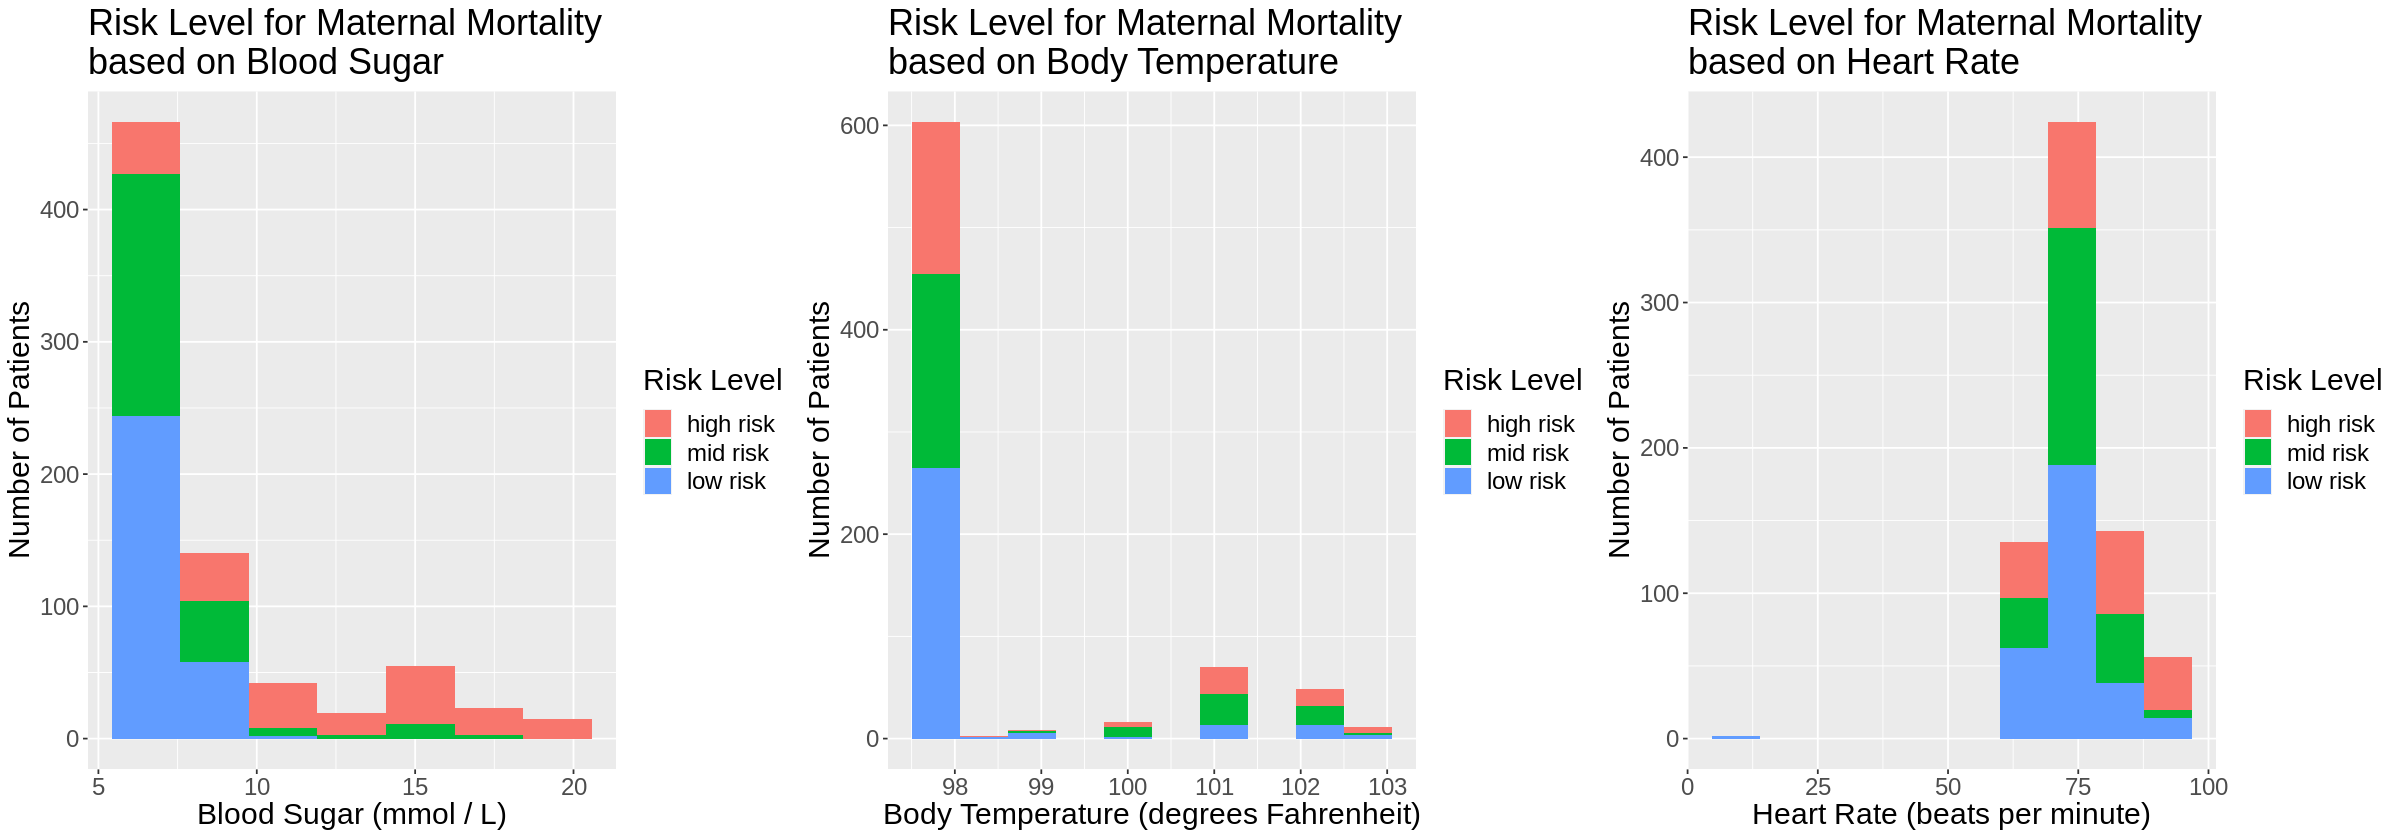

In [40]:
maternal_health_dataset

risk_distribution

na

full_join(min_vals_high, max_vals_high)
full_join(min_vals_mid, max_vals_mid)
full_join(min_vals_low, max_vals_low)

options(repr.plot.height = 7, repr.plot.width = 20)
grid.arrange(age_histogram, systolic_histogram, diastolic_histogram, nrow = 1)
grid.arrange(bs_histogram, bodytemp_histogram, heartrate_histogram, nrow = 1)

### Methods